In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings(action='ignore')

In [9]:
df = pd.read_csv('bank_marketing.csv')
df.head()

age        job marital_status    education  default housing loan  \
0   56  housemaid        married     basic.4y       no      no   no   
1   57   services        married  high.school  unknown      no   no   
2   37   services        married  high.school       no     yes   no   
3   40     admin.        married     basic.6y       no      no   no   
4   56   services        married  high.school       no      no  yes   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  telephone   may         mon  ...         1    999         0  nonexistent   
1  telephone   may         mon  ...         1    999         0  nonexistent   
2  telephone   may         mon  ...         1    999         0  nonexistent   
3  telephone   may         mon  ...         1    999         0  nonexistent   
4  telephone   may         mon  ...         1    999         0  nonexistent   

  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  \
0          1.1          93.994          -36.4      4.857       5191.0   
1          1.1          93.994          -36.4      4.857       5191.0   
2          1.1          93.994          -36.4      4.857       5191.0   
3          1.1          93.994          -36.4      4.857       5191.0   
4          1.1          93.994          -36.4      4.857       5191.0   

   response  
0        no  
1        no  
2        no  
3        no  
4        no  

[5 rows x 21 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital_status  41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [6]:
sns.countplot(df.response)

<AxesSubplot:xlabel='response', ylabel='count'>

# Bivariate Analysis

<AxesSubplot:xlabel='response', ylabel='age'>

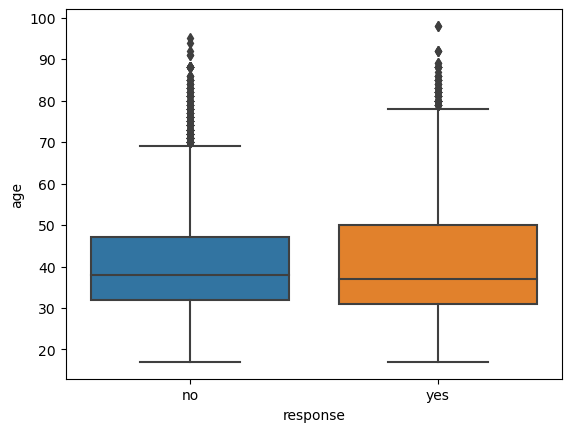

In [4]:
sns.boxplot(x = df.response,y=df.age)

<AxesSubplot:xlabel='age'>

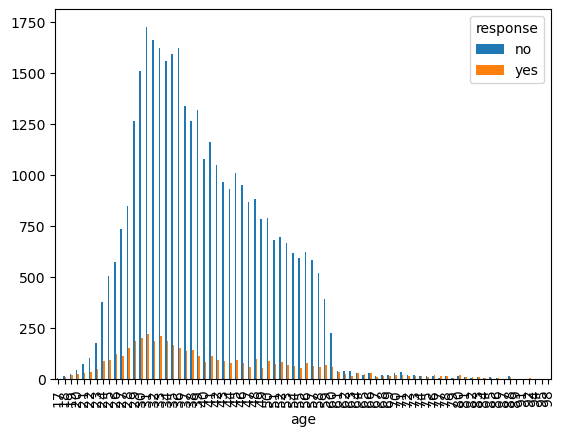

In [5]:
pd.crosstab(df.age, df.response).plot(kind = 'bar')

In [13]:
temp = pd.crosstab(df.marital_status, df.response)
temp

response           no   yes
marital_status             
divorced         4136   476
married         22396  2532
single           9948  1620
unknown            68    12

In [15]:
temp['total'] = temp.no + temp.yes
temp['prob_yes'] = temp.yes/temp.total

temp

response           no   yes  total  prob_yes
marital_status                              
divorced         4136   476   4612  0.103209
married         22396  2532  24928  0.101573
single           9948  1620  11568  0.140041
unknown            68    12     80  0.150000

<AxesSubplot:xlabel='marital_status'>

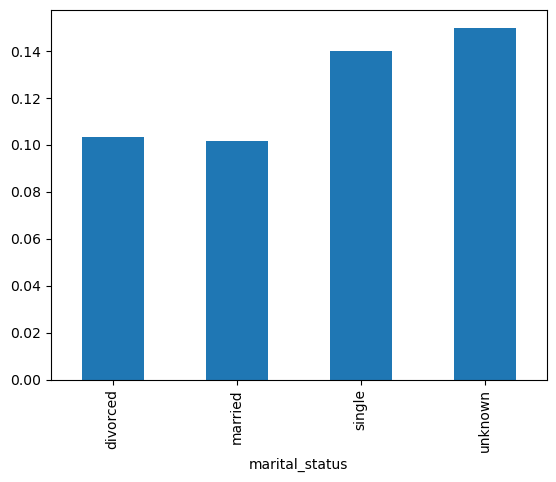

In [16]:
temp.prob_yes.plot(kind='bar')

<AxesSubplot:xlabel='marital_status'>

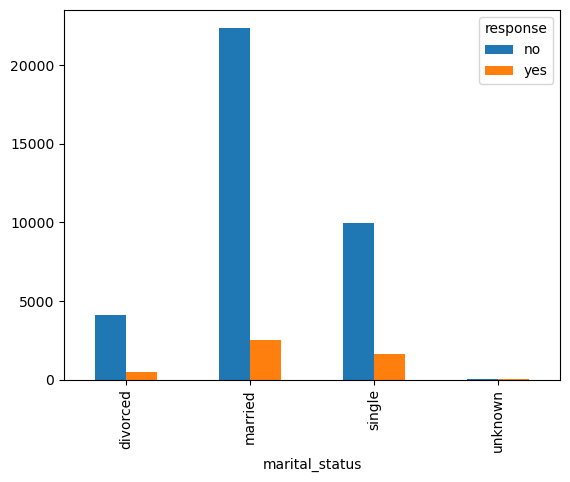

In [10]:
pd.crosstab(df.marital_status, df.response).plot(kind = 'bar')

In [18]:
df.replace('unknown',np.nan).isnull().mean()*100

age                0.000000
job                0.801204
marital_status     0.194231
education          4.202680
default           20.872584
housing            2.403613
loan               2.403613
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp_var_rate       0.000000
cons_price_idx     0.000000
cons_conf_idx      0.000000
euribor3m          0.000000
nr_employed        0.000000
response           0.000000
dtype: float64

In [28]:
df.replace('unknown',np.nan).dropna(subset = ['housing','education','job','marital_status']).isnull().mean()*100

age                0.00000
job                0.00000
marital_status     0.00000
education          0.00000
default           20.28239
housing            0.00000
loan               0.00000
contact            0.00000
month              0.00000
day_of_week        0.00000
duration           0.00000
campaign           0.00000
pdays              0.00000
previous           0.00000
poutcome           0.00000
emp_var_rate       0.00000
cons_price_idx     0.00000
cons_conf_idx      0.00000
euribor3m          0.00000
nr_employed        0.00000
response           0.00000
dtype: float64

In [33]:
df_v1 = df.replace('unknown',np.nan).dropna(subset = ['housing','education','job','marital_status'])

In [34]:
(df.shape[0] - df_v1.shape[0])/df.shape[0]*100

7.145285034476061

In [35]:
df_v1.isnull().sum()

age                  0
job                  0
marital_status       0
education            0
default           7757
housing              0
loan                 0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp_var_rate         0
cons_price_idx       0
cons_conf_idx        0
euribor3m            0
nr_employed          0
response             0
dtype: int64

In [36]:
df.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [37]:
df_v1.default.value_counts()

no     30485
yes        3
Name: default, dtype: int64

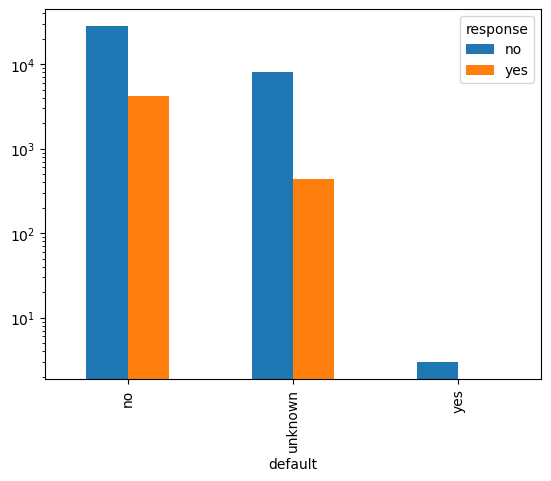

In [41]:
pd.crosstab(df.default, df.response).plot(kind='bar')
plt.yscale('log')

<AxesSubplot:xlabel='default'>

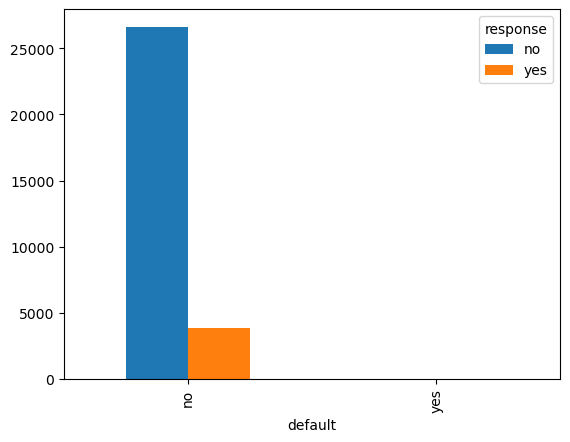

In [39]:
pd.crosstab(df_v1.default, df.response).plot(kind='bar')

# KNearest Neighbor

In [44]:
df_v1.replace(np.nan, 'unknown', inplace =True)

In [46]:
X = df_v1.drop(['response','duration'], axis =1)
y = df_v1.response.map({'yes':1, 'no':0})

In [47]:
X_dummies = pd.get_dummies(X)

In [48]:
X_dummies

age  campaign  pdays  previous  emp_var_rate  cons_price_idx  \
0       56         1    999         0           1.1          93.994   
1       57         1    999         0           1.1          93.994   
2       37         1    999         0           1.1          93.994   
3       40         1    999         0           1.1          93.994   
4       56         1    999         0           1.1          93.994   
...    ...       ...    ...       ...           ...             ...   
41183   73         1    999         0          -1.1          94.767   
41184   46         1    999         0          -1.1          94.767   
41185   56         2    999         0          -1.1          94.767   
41186   44         1    999         0          -1.1          94.767   
41187   74         3    999         1          -1.1          94.767   

       cons_conf_idx  euribor3m  nr_employed  job_admin.  ...  month_oct  \
0              -36.4      4.857       5191.0           0  ...          0   
1              -36.4      4.857       5191.0           0  ...          0   
2              -36.4      4.857       5191.0           0  ...          0   
3              -36.4      4.857       5191.0           1  ...          0   
4              -36.4      4.857       5191.0           0  ...          0   
...              ...        ...          ...         ...  ...        ...   
41183          -50.8      1.028       4963.6           0  ...          0   
41184          -50.8      1.028       4963.6           0  ...          0   
41185          -50.8      1.028       4963.6           0  ...          0   
41186          -50.8      1.028       4963.6           0  ...          0   
41187          -50.8      1.028       4963.6           0  ...          0   

       month_sep  day_of_week_fri  day_of_week_mon  day_of_week_thu  \
0              0                0                1                0   
1              0                0                1                0   
2              0                0                1                0   
3              0                0                1                0   
4              0                0                1                0   
...          ...              ...              ...              ...   
41183          0                1                0                0   
41184          0                1                0                0   
41185          0                1                0                0   
41186          0                1                0                0   
41187          0                1                0                0   

       day_of_week_tue  day_of_week_wed  poutcome_failure  \
0                    0                0                 0   
1                    0                0                 0   
2                    0                0                 0   
3                    0                0                 0   
4                    0                0                 0   
...                ...              ...               ...   
41183                0                0                 0   
41184                0                0                 0   
41185                0                0                 0   
41186                0                0                 0   
41187                0                0                 1   

       poutcome_nonexistent  poutcome_success  
0                         1                 0  
1                         1                 0  
2                         1                 0  
3                         1                 0  
4                         1                 0  
...                     ...               ...  
41183                     1                 0  
41184                     1                 0  
41185                     1                 0  
41186                     1                 0  
41187                     0                 0  

[38245 rows x 57 columns]

In [50]:
train_X, test_X, train_y, test_y = train_test_split(X_dummies,y,test_size=0.3)

In [53]:
train_X, test_X, train_y, test_y = train_test_split(np.ascontiguousarray(X_dummies),y,test_size=0.3)

In [54]:
knn = KNeighborsClassifier()
knn.fit(train_X,train_y)

KNeighborsClassifier()

In [55]:
knn.score(test_X,test_y)

0.89097089070943

In [56]:
print(classification_report(knn.predict(test_X),test_y))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94     10762
           1       0.29      0.52      0.37       712

    accuracy                           0.89     11474
   macro avg       0.63      0.72      0.66     11474
weighted avg       0.92      0.89      0.90     11474



In [1]:
from tqdm import tqdm